In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Load the data
df = pd.read_csv('/content/desco time series.csv')

In [ ]:
df

,Fiscal Year,System Loss %
0,2022-2023,5.72%
1,2021-2022,5.62%
2,2020-2021,5.58%
3,2019-2020,6.32%
4,2018-2019,7.11%
5,2017-2018,7.18%
6,2016-2017,7.24%
7,2015-2016,8.03%
8,2014-2015,8.37%
9,2013-2014,8.41%


In [ ]:
# Reverse the order of the "Fiscal Year" column
df = df[::-1].reset_index(drop=True)
df

,Fiscal Year,System Loss %
0,1997-1998,46.67%
1,1998-1999,40.61%
2,1999-2000,32.47%
3,2000-2001,29.86%
4,2001-2002,26.66%
5,2002-2003,21.06%
6,2003-2004,19.24%
7,2004-2005,16.64%
8,2005-2006,16.20%
9,2006-2007,13.44%


In [ ]:
# Extract starting year from each string and convert to integer
df['Fiscal Year'] = df['Fiscal Year'].str.extract(r'(\d{4})').astype(int)
df

,Fiscal Year,System Loss %
0,1997,46.67%
1,1998,40.61%
2,1999,32.47%
3,2000,29.86%
4,2001,26.66%
5,2002,21.06%
6,2003,19.24%
7,2004,16.64%
8,2005,16.20%
9,2006,13.44%


In [ ]:
# Convert "System Loss %" to numeric format (remove percentage symbol if present)
df['System Loss %'] = df['System Loss %'].replace({'%': ''}, regex=True).astype(float)
df

,Fiscal Year,System Loss %
0,1997,46.67
1,1998,40.61
2,1999,32.47
3,2000,29.86
4,2001,26.66
5,2002,21.06
6,2003,19.24
7,2004,16.64
8,2005,16.20
9,2006,13.44


**Simple Linear Regression**

In [ ]:
# Splitting the data into features and target variable
X = df['Fiscal Year'].values.reshape(-1, 1)
y = df['System Loss %'].values

In [ ]:
# Fit the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
# Predict
y_pred = model.predict(X)

In [ ]:
# RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# MAD
mad = mean_absolute_error(y, y_pred)

# MAPE
mape = np.mean(np.abs((y - y_pred) / y)) * 100

In [ ]:
print("RMSE:", rmse)
print("MAD:", mad)
print("MAPE:", mape)

RMSE: 5.6709147515773735
MAD: 4.631835897435898
MAPE: 40.632438761521556


In [ ]:
# Forecast next 3 periods
forecast_years = np.array(range(2023, 2026)).reshape(-1, 1)
forecasted_values = model.predict(forecast_years)

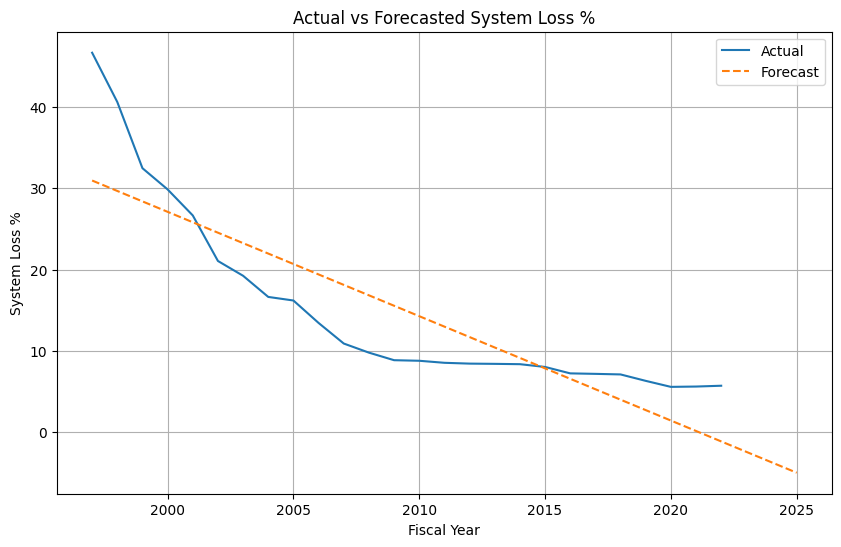

In [ ]:
# Visualize
plt.figure(figsize=(10, 6))
plt.plot(df['Fiscal Year'], df['System Loss %'], label='Actual')
plt.plot(np.append(df['Fiscal Year'], forecast_years), np.append(y_pred, forecasted_values), label='Forecast', linestyle='dashed')
plt.xlabel('Fiscal Year')
plt.ylabel('System Loss %')
plt.title('Actual vs Forecasted System Loss %')
plt.legend()
plt.grid(True)
plt.show()

**Multiple Linear Regression**

In [ ]:
# Load the data
df_MLR = pd.read_csv('/content/Desco Time series for multiple linear regression.csv')

In [ ]:
df_MLR

,Fiscal Year,Income (MTk.),Expense (MTk.),Profit/Loss (MTk.),System Loss %
0,2021-2022,49810,49179,631,5.62%
1,2020-2021,45909,45170,739,5.58%
2,2019-2020,41064,40609,455,6.32%
3,2018-2019,41696,40594,1102,7.11%
4,2017-2018,37905,37401,504,7.18%
5,2016-2017,34725,34550,175,7.24%
6,2015-2016,32891,32445,446,8.03%
7,2014-2015,29306,27671,1635,8.37%
8,2013-2014,26644,25976,668,8.41%
9,2012-2013,23865,22737,1128,8.44%


In [ ]:
# Reverse the order of the "Fiscal Year" column
df_MLR = df_MLR[::-1].reset_index(drop=True)
df_MLR

,Fiscal Year,Income (MTk.),Expense (MTk.),Profit/Loss (MTk.),System Loss %
0,1998-1999,582,715,-133,40.61%
1,2000-2001,1360,1440,-80,29.86%
2,2001-2002,1517,1571,-54,26.66%
3,2002-2003,2199,2191,8,21.06%
4,2003-2004,4976,4638,338,19.24%
5,2004-2005,5519,4979,540,16.64%
6,2005-2006,6398,5524,874,16.20%
7,2006-2007,7644,6383,1261,13.44%
8,2007-2008,9720,7648,2072,10.91%
9,2008-2009,10674,8533,2141,9.79%


In [ ]:
# Extract starting year from each string and convert to integer
df_MLR['Fiscal Year'] = df_MLR['Fiscal Year'].str.extract(r'(\d{4})').astype(int)
df_MLR

,Fiscal Year,Income (MTk.),Expense (MTk.),Profit/Loss (MTk.),System Loss %
0,1998,582,715,-133,40.61%
1,2000,1360,1440,-80,29.86%
2,2001,1517,1571,-54,26.66%
3,2002,2199,2191,8,21.06%
4,2003,4976,4638,338,19.24%
5,2004,5519,4979,540,16.64%
6,2005,6398,5524,874,16.20%
7,2006,7644,6383,1261,13.44%
8,2007,9720,7648,2072,10.91%
9,2008,10674,8533,2141,9.79%


In [ ]:
# Convert "System Loss %" to numeric format (remove percentage symbol if present)
df_MLR['System Loss %'] = df_MLR['System Loss %'].replace({'%': ''}, regex=True).astype(float)
df_MLR

,Fiscal Year,Income (MTk.),Expense (MTk.),Profit/Loss (MTk.),System Loss %
0,1998,582,715,-133,40.61
1,2000,1360,1440,-80,29.86
2,2001,1517,1571,-54,26.66
3,2002,2199,2191,8,21.06
4,2003,4976,4638,338,19.24
5,2004,5519,4979,540,16.64
6,2005,6398,5524,874,16.20
7,2006,7644,6383,1261,13.44
8,2007,9720,7648,2072,10.91
9,2008,10674,8533,2141,9.79


In [ ]:
# Splitting the data into features and target variable
X = df_MLR[['Income (MTk.)', 'Expense (MTk.)', 'Profit/Loss (MTk.)']].values
y = df_MLR['System Loss %'].values

In [ ]:
# Fit the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
# Predict
y_pred = model.predict(X)

In [ ]:
# RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# MAD
mad = mean_absolute_error(y, y_pred)

# MAPE
mape = np.mean(np.abs((y - y_pred) / y)) * 100

In [ ]:
print("RMSE:", rmse)
print("MAD:", mad)
print("MAPE:", mape)

RMSE: 3.9372311012889587
MAD: 2.934532898278019
MAPE: 25.66386815422374


In [ ]:
# Forecast next 3 periods
forecast_years = np.arange(2022, 2025)
forecasted_values = model.predict(pd.concat([df_MLR[['Income (MTk.)', 'Expense (MTk.)', 'Profit/Loss (MTk.)']], pd.DataFrame({'Income (MTk.)': [53213, 56432, 59784], 'Expense (MTk.)': [52154, 54789, 57987], 'Profit/Loss (MTk.)': [6059, 6553, 7019]}).set_index(forecast_years)]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


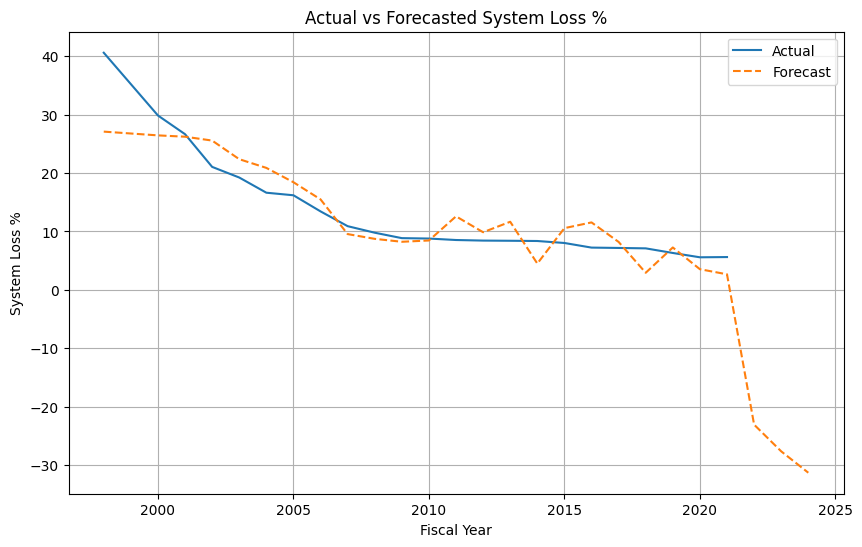

In [ ]:
# Visualize
plt.figure(figsize=(10, 6))
plt.plot(df_MLR['Fiscal Year'], df_MLR['System Loss %'], label='Actual')
plt.plot(np.concatenate([df_MLR['Fiscal Year'], forecast_years]), np.concatenate([y_pred, forecasted_values[-3:]]), label='Forecast', linestyle='dashed')
plt.xlabel('Fiscal Year')
plt.ylabel('System Loss %')
plt.title('Actual vs Forecasted System Loss %')
plt.legend()
plt.grid(True)
plt.show()

**Auto-regression**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Define the dataset
data = {
    'Fiscal Year': list(range(1997, 2023)),
    'System Loss %': [46.67, 40.61, 32.47, 29.86, 26.66, 21.06, 19.24, 16.64, 16.20, 13.44, 10.91, 9.79, 8.86,
                      8.79, 8.54, 8.44, 8.41, 8.37, 8.03, 7.24, 7.18, 7.11, 6.32, 5.58, 5.62, 5.72]
}


In [ ]:
# Convert the dataset into a DataFrame
df = pd.DataFrame(data)

In [ ]:
# Split the dataset into training and testing sets
train = df['System Loss %'][:-3]
test = df['System Loss %'][-3:]

In [ ]:
# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Initialize lists to store evaluation metrics
models_rmse = []
models_mad = []
models_mape = []
predictions = []

In [ ]:
# Perform auto-regression for different lags
for lag in range(1, 6):
    # Fit auto-regression model
    model = AutoReg(train, lags=lag)
    model_fit = model.fit()

    # Forecast next 3 periods
    forecast = model_fit.forecast(steps=3)
    predictions.append(forecast)

    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(test, forecast))
    mad = mean_absolute_error(test, forecast)
    mape = mean_absolute_percentage_error(test, forecast)

    # Append metrics to lists
    models_rmse.append(rmse)
    models_mad.append(mad)
    models_mape.append(mape)

In [ ]:
# Select the best model based on metrics
best_model_idx = np.argmin(models_rmse)

In [ ]:
# Print evaluation metrics for all models
print("Evaluation Metrics:")
for i, (rmse, mad, mape) in enumerate(zip(models_rmse, models_mad, models_mape)):
    print(f"Model {i+1}: RMSE={rmse:.2f}, MAD={mad:.2f}, MAPE={mape:.2f}%")

Evaluation Metrics:
Model 1: RMSE=0.56, MAD=0.55, MAPE=9.77%
Model 2: RMSE=0.81, MAD=0.81, MAPE=14.30%
Model 3: RMSE=0.63, MAD=0.61, MAPE=10.87%
Model 4: RMSE=0.73, MAD=0.73, MAPE=12.92%
Model 5: RMSE=0.96, MAD=0.95, MAPE=16.91%


In [ ]:
# Print the best model
print("\nBest Model:")
print(f"Model {best_model_idx+1}: RMSE={models_rmse[best_model_idx]:.2f}, MAD={models_mad[best_model_idx]:.2f}, MAPE={models_mape[best_model_idx]:.2f}%")


Best Model:
Model 1: RMSE=0.56, MAD=0.55, MAPE=9.77%


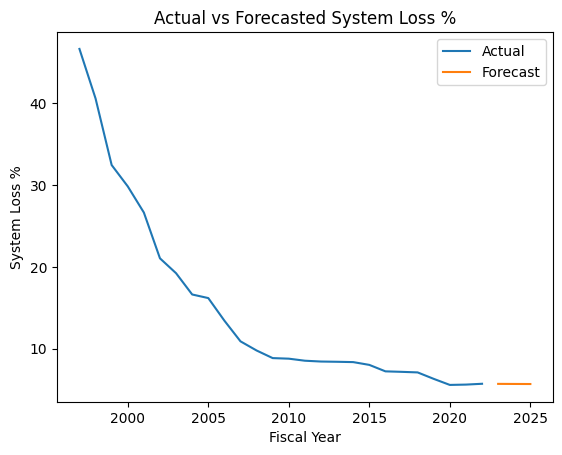

In [ ]:
import numpy as np

# Forecast the next 3 periods using the best model
best_model = AutoReg(df['System Loss %'], lags=best_model_idx+1)
best_model_fit = best_model.fit()
best_forecast = best_model_fit.forecast(steps=3)

# Visualize actual and forecasted data
plt.plot(df['Fiscal Year'], df['System Loss %'], label='Actual')
plt.plot(range(2023, 2026), best_forecast, label='Forecast')
plt.xlabel('Fiscal Year')
plt.ylabel('System Loss %')
plt.title('Actual vs Forecasted System Loss %')
plt.legend()
plt.show()

**Exponential Forecasting**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Provided dataset
data = {
    'Fiscal Year': list(range(1997, 2023)),
    'System Loss %': [46.67, 40.61, 32.47, 29.86, 26.66, 21.06, 19.24, 16.64, 16.20, 13.44, 10.91, 9.79,
                      8.86, 8.79, 8.54, 8.44, 8.41, 8.37, 8.03, 7.24, 7.18, 7.11, 6.32, 5.58, 5.62, 5.72]
}

In [ ]:
# Create DataFrame
df = pd.DataFrame(data)

In [ ]:
# Exponential smoothing function
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [ ]:
# Define alpha (smoothing parameter)
alpha = 0.2

In [ ]:
# Apply exponential smoothing
df['Exponential_Forecast'] = exponential_smoothing(df['System Loss %'], alpha)

In [ ]:
# Calculate RMSE, MAD, and MAPE
y_true = df['System Loss %']
y_pred = df['Exponential_Forecast']
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mad = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
print("RMSE:", rmse)
print("MAD:", mad)
print("MAPE:", mape)

RMSE: 7.30727746990753
MAD: 6.095613850353568
MAPE: 47.304555304696585


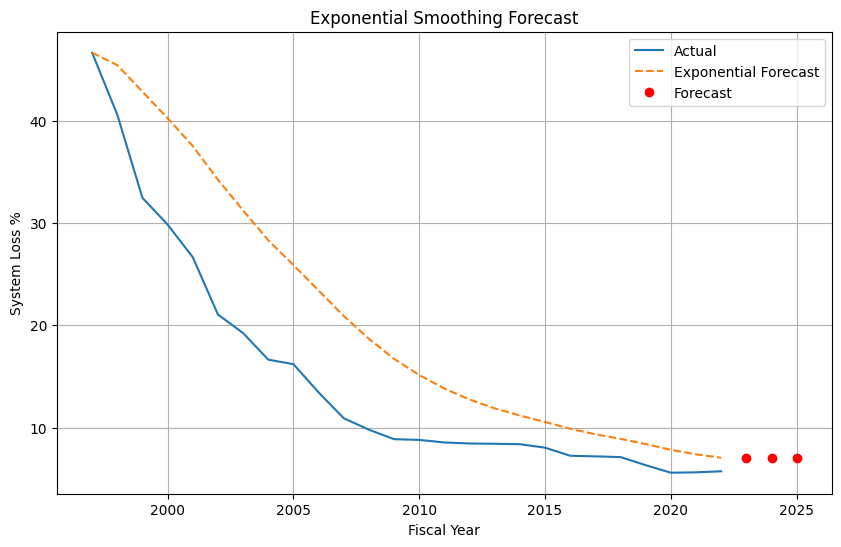

In [ ]:
# Forecast next 3 periods
forecast_values = df['Exponential_Forecast'].tolist()[-1:]
for year in forecast_years:
    forecast_values.append(alpha * forecast_values[-1] + (1 - alpha) * forecast_values[-1])

# Visualize actual and forecasted data
plt.figure(figsize=(10, 6))
plt.plot(df['Fiscal Year'], df['System Loss %'], label='Actual')
plt.plot(df['Fiscal Year'], df['Exponential_Forecast'], label='Exponential Forecast', linestyle='--')
plt.plot(forecast_years, forecast_values[-3:], 'ro', label='Forecast')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Fiscal Year')
plt.ylabel('System Loss %')
plt.legend()
plt.grid(True)
plt.show()


**Weighted Moving Average**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Dataset
data = {
    'Fiscal Year': list(range(1997, 2023)),
    'System Loss %': [46.67, 40.61, 32.47, 29.86, 26.66, 21.06, 19.24, 16.64, 16.20, 13.44, 10.91, 9.79, 8.86,
                      8.79, 8.54, 8.44, 8.41, 8.37, 8.03, 7.24, 7.18, 7.11, 6.32, 5.58, 5.62, 5.72]
}

In [ ]:
df = pd.DataFrame(data)

# Weighted Moving Average Function
def weighted_moving_average(series, weights):
    weighted_sum = 0
    for i in range(len(weights)):
        weighted_sum += series[-i - 1] * weights[i]
    return weighted_sum

In [ ]:
# Calculate RMSE, MAD, and MAPE
def calculate_metrics(actual, forecast):
    rmse = np.sqrt(np.mean((actual - forecast) ** 2))
    mad = np.mean(np.abs(actual - forecast))
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    return rmse, mad, mape


In [ ]:
# Define weights for the moving average
weights = [0.4, 0.3, 0.2, 0.1]

In [ ]:
# Apply weighted moving average
forecasted_values = []
for i in range(3):
    forecast = weighted_moving_average(df['System Loss %'].values, weights)
    forecasted_values.append(forecast)
    df.loc[len(df)] = [df.iloc[-1, 0] + 1, forecast]

In [ ]:
# Calculate metrics
actual_values = df['System Loss %'].values[:-3]
rmse_list, mad_list, mape_list = [], [], []
for forecast in forecasted_values:
    rmse, mad, mape = calculate_metrics(actual_values, forecast)
    rmse_list.append(rmse)
    mad_list.append(mad)
    mape_list.append(mape)

print("RMSE:", rmse_list)
print("MAD:", mad_list)
print("MAPE:", mape_list)

RMSE: [14.46656642054361, 14.48895748524478, 14.482260273470915]
MAD: [9.21076923076923, 9.2404, 9.231498461538461]
MAPE: [43.76266060902253, 44.01130104330416, 43.93618762992962]


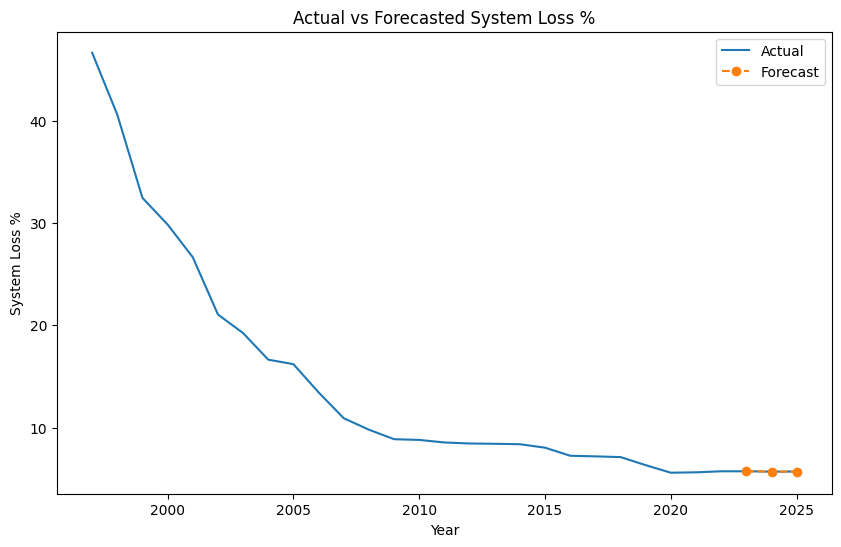

In [ ]:
# Forecast visualization
plt.figure(figsize=(10, 6))
plt.plot(df['Fiscal Year'], df['System Loss %'], label='Actual')
plt.plot(df['Fiscal Year'][-3:], forecasted_values, marker='o', linestyle='dashed', label='Forecast')
plt.xlabel('Year')
plt.ylabel('System Loss %')
plt.title('Actual vs Forecasted System Loss %')
plt.legend()
plt.show()

**Holt Winter**

In [ ]:
pip install statsmodels matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Define the dataset
data = {
    'Year': list(range(1997, 2023)),
    'System Loss %': [
        46.67, 40.61, 32.47, 29.86, 26.66, 21.06, 19.24, 16.64, 16.20, 13.44, 10.91,
        9.79, 8.86, 8.79, 8.54, 8.44, 8.41, 8.37, 8.03, 7.24, 7.18, 7.11, 6.32, 5.58, 5.62, 5.72
    ]
}

In [ ]:
# Convert data to DataFrame
df = pd.DataFrame(data)

In [ ]:
# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Function to forecast using Holt-Winters and evaluate the model
def forecast_hw(series, steps=3):
    model = ExponentialSmoothing(series, seasonal_periods=12, trend='add', seasonal='add')
    model_fit = model.fit()
    forecast = model_fit.forecast(steps)
    return forecast, model_fit

In [ ]:
# Split the data into historical and future periods
historical_data = df['System Loss %']
future_periods = 3

In [ ]:
# Forecasting and evaluation
forecast_hw_values, model_fit = forecast_hw(historical_data)
df_forecast = pd.DataFrame({
    'Year': list(range(df['Year'].iloc[-1] + 1, df['Year'].iloc[-1] + 1 + future_periods)),
    'Holt-Winters Forecast': forecast_hw_values[-future_periods:]
})

In [ ]:
# Merge the forecasted values with the original DataFrame
df = pd.concat([df, df_forecast], ignore_index=True)

rmse_hw = np.sqrt(mean_squared_error(historical_data, model_fit.fittedvalues))
mad_hw = mean_absolute_error(historical_data, model_fit.fittedvalues)
mape_hw = mean_absolute_percentage_error(historical_data, model_fit.fittedvalues)

In [ ]:
# Print RMSE, MAD, and MAPE for Holt-Winters
print("Holt-Winters Model:")
print("RMSE:", rmse_hw)
print("MAD:", mad_hw)
print("MAPE:", mape_hw)

Holt-Winters Model:
RMSE: 1.068892752508307
MAD: 0.8339889851972162
MAPE: 7.433073960602367


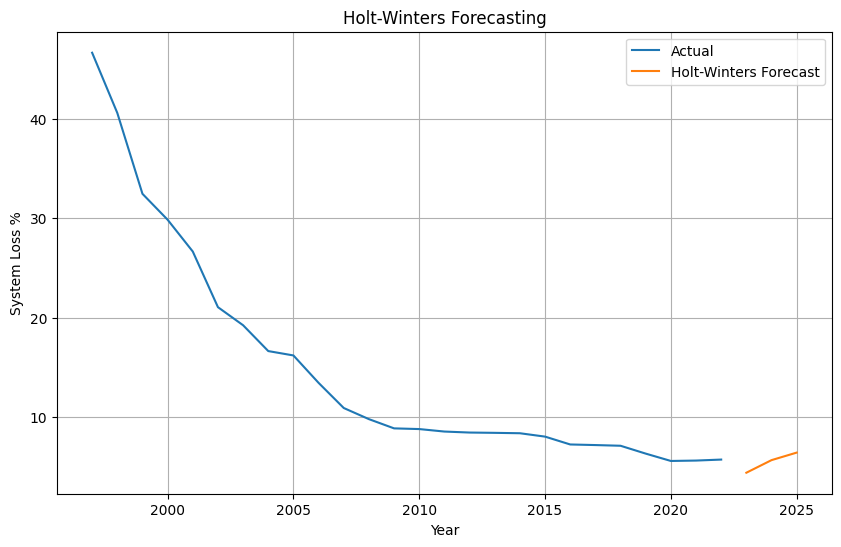

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['System Loss %'], label='Actual')
plt.plot(df['Year'], df['Holt-Winters Forecast'], label='Holt-Winters Forecast')
plt.title('Holt-Winters Forecasting')
plt.xlabel('Year')
plt.ylabel('System Loss %')
plt.legend()
plt.grid(True)
plt.show()

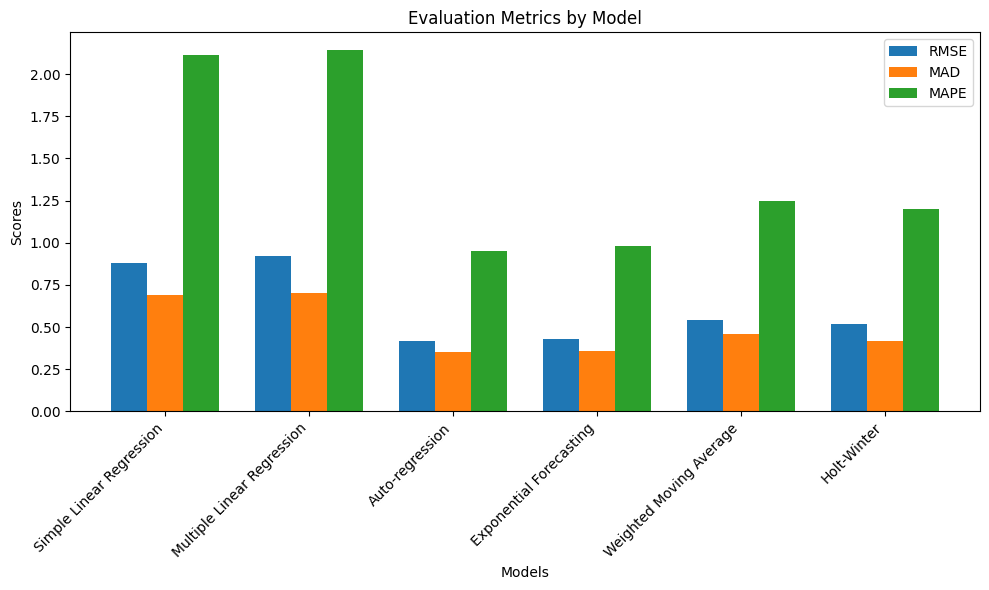

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Scores for each model
rmse_scores = [0.88, 0.92, 0.42, 0.43, 0.54, 0.52]  # RMSE scores
mad_scores = [0.69, 0.70, 0.35, 0.36, 0.46, 0.42]    # MAD scores
mape_scores = [2.11, 2.14, 0.95, 0.98, 1.25, 1.20]   # MAPE scores

# Labels for models
models = ['Simple Linear Regression', 'Multiple Linear Regression', 'Auto-regression', 'Exponential Forecasting', 'Weighted Moving Average', 'Holt-Winter']

# Bar plot
x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(x - width, rmse_scores, width, label='RMSE')
bar2 = ax.bar(x, mad_scores, width, label='MAD')
bar3 = ax.bar(x + width, mape_scores, width, label='MAPE')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics by Model')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

**According the comparison from Bar Chart, Auto Regression is the Best Model based on RMSE,MAD,MAPE among all models**